In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/Border_Crossing_Entry_Data.csv")

In [ ]:
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point
0,International Falls,Minnesota,3604,US-Canada Border,Oct 2023,Trucks,1372,48.608,-93.401,POINT (-93.401355 48.6078)
1,Sumas,Washington,3009,US-Canada Border,Oct 2023,Train Passengers,57,49.002,-122.265,POINT (-122.264805 49.002388)
2,Naco,Arizona,2603,US-Mexico Border,Sep 2023,Trucks,270,31.334,-109.948,POINT (-109.948413 31.334084)
3,Wildhorse,Montana,3323,US-Canada Border,Sep 2023,Trucks,42,48.999,-110.215,POINT (-110.215083 48.999361)
4,Calais,Maine,115,US-Canada Border,Sep 2023,Trains,15,45.189,-67.275,POINT (-67.275381 45.188548)


In [ ]:
df.describe()

,Port Code,Value,Latitude,Longitude
count,225797.000000,2.257970e+05,225796.000000,225796.000000
mean,2438.602944,2.646726e+04,43.970196,-99.769407
std,1206.038468,1.249585e+05,8.143162,18.408812
min,101.000000,0.000000e+00,25.952000,-141.001000
25%,2303.000000,0.000000e+00,42.999000,-114.728000
50%,3012.000000,1.910000e+02,48.122000,-101.628000
75%,3401.000000,3.409000e+03,49.000000,-84.361000
max,3814.000000,2.841946e+06,62.615000,-66.980000


In [ ]:
df.isnull().sum()

Port Name    0
State        0
Port Code    0
Border       0
Date         0
Measure      0
Value        0
Latitude     1
Longitude    1
Point        1
dtype: int64

In [ ]:
df.describe(include='all')

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point
count,225797,225797,225797.000000,225797,225797,225797,2.257970e+05,225796.000000,225796.000000,225796
unique,117,14,NaN,2,313,12,NaN,NaN,NaN,117
top,Eastport,North Dakota,NaN,US-Canada Border,May 2010,Personal Vehicle Passengers,NaN,NaN,NaN,POINT (-115.388018 32.673389)
freq,4423,35062,NaN,172823,1356,22665,NaN,NaN,NaN,4123
mean,NaN,NaN,2438.602944,NaN,NaN,NaN,2.646726e+04,43.970196,-99.769407,NaN
std,NaN,NaN,1206.038468,NaN,NaN,NaN,1.249585e+05,8.143162,18.408812,NaN
min,NaN,NaN,101.000000,NaN,NaN,NaN,0.000000e+00,25.952000,-141.001000,NaN
25%,NaN,NaN,2303.000000,NaN,NaN,NaN,0.000000e+00,42.999000,-114.728000,NaN
50%,NaN,NaN,3012.000000,NaN,NaN,NaN,1.910000e+02,48.122000,-101.628000,NaN
75%,NaN,NaN,3401.000000,NaN,NaN,NaN,3.409000e+03,49.000000,-84.361000,NaN


In [ ]:
df.duplicated().sum()

10

In [ ]:
Border_count = df.Border.value_counts()
Border_count

Border
US-Canada Border    172823
US-Mexico Border     52974
Name: count, dtype: int64

In [ ]:
z_scores = np.abs((df['Value'] - df['Value'].mean()) / df['Value'].std())

# Define a threshold for outliers
threshold = 3  # Adjust as needed

# Identify outliers based on the Z-score
outliers = df[z_scores > threshold]

# Print the outliers
print("Outliers detected:")
print(outliers)

Outliers detected:
                    Port Name       State  Port Code            Border  \
494                   Hidalgo       Texas       2305  US-Mexico Border   
504                San Ysidro  California       2504  US-Mexico Border   
508                  San Luis     Arizona       2608  US-Mexico Border   
584                   Detroit    Michigan       3801  US-Canada Border   
630     Buffalo Niagara Falls    New York        901  US-Canada Border   
...                       ...         ...        ...               ...   
225618              Otay Mesa  California       2506  US-Mexico Border   
225695               Calexico  California       2503  US-Mexico Border   
225697               Calexico  California       2503  US-Mexico Border   
225772                El Paso       Texas       2402  US-Mexico Border   
225782            Brownsville       Texas       2301  US-Mexico Border   

            Date                      Measure    Value  Latitude  Longitude  \
494     Nov 2

In [ ]:
# Filter out outliers based on the Z-score
df_no_outliers = df[z_scores <= threshold]

# Print the number of outliers removed
num_outliers_removed = len(df) - len(df_no_outliers)
print("Number of outliers removed:", num_outliers_removed)

Number of outliers removed: 4120


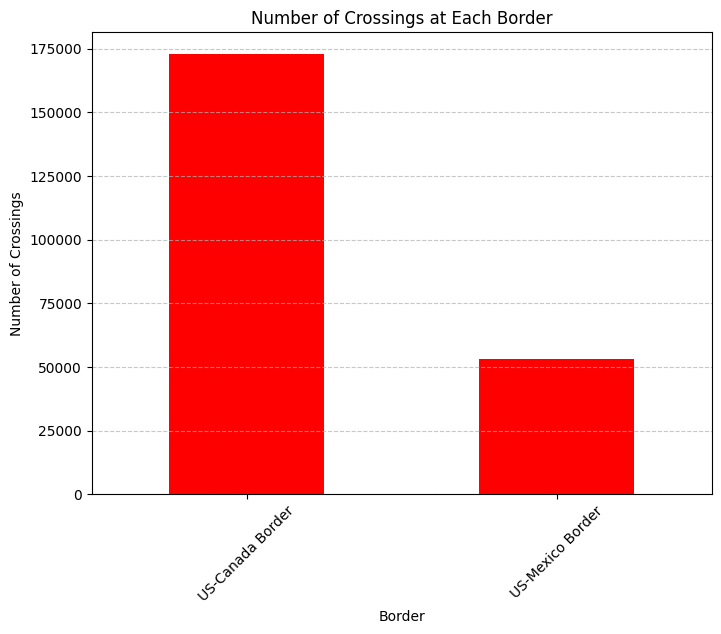

In [ ]:
# Count the number of crossings at each border
border_count = df['Border'].value_counts()

# Plot the number of crossings at each border
plt.figure(figsize=(8, 6))
border_count.plot(kind='bar', color='red')
plt.title('Number of Crossings at Each Border')
plt.xlabel('Border')
plt.ylabel('Number of Crossings')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


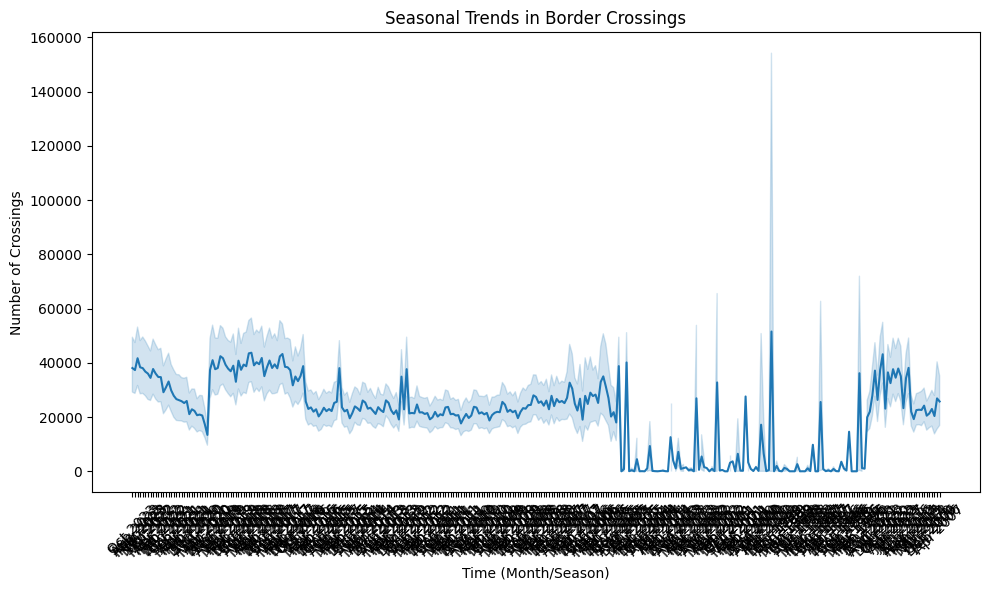

In [ ]:
# Seasonal Trends in Border Crossings
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Value', data=df)
plt.title('Seasonal Trends in Border Crossings')
plt.xlabel('Time (Month/Season)')
plt.ylabel('Number of Crossings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

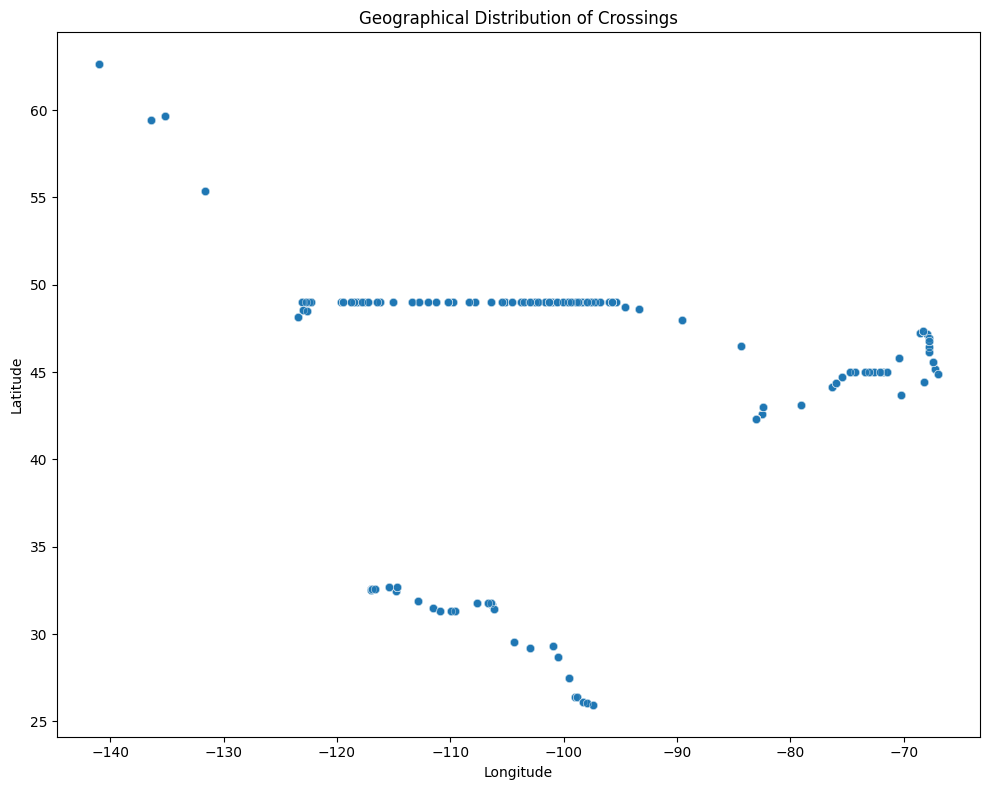

In [ ]:
#  Geographical Distribution of Crossings

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Longitude', y='Latitude', data=df, alpha=0.5)
plt.title('Geographical Distribution of Crossings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()



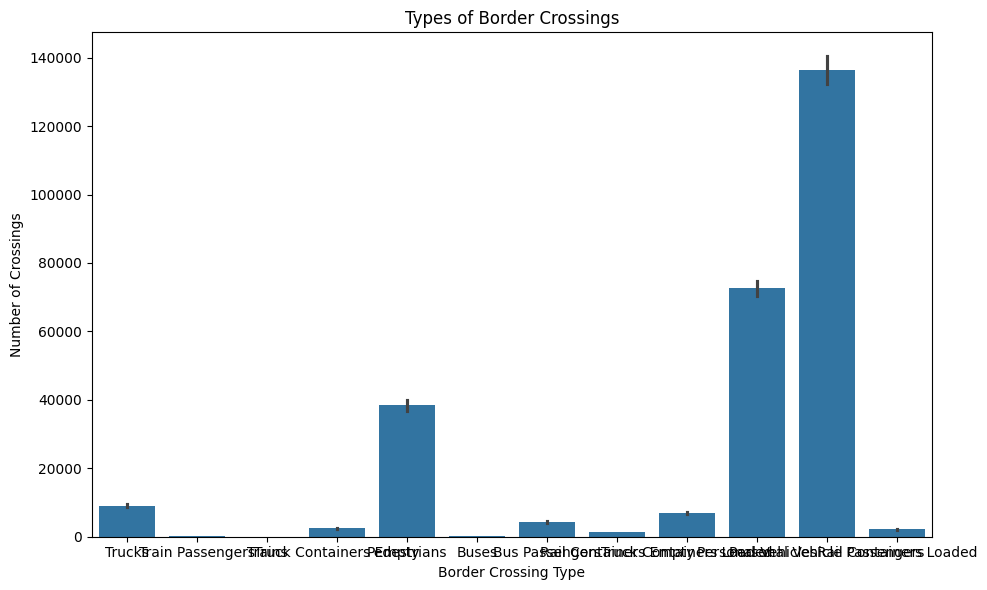

In [ ]:
 # Types of Border Crossings
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(x='Measure', y='Value', data=df)
plt.title('Types of Border Crossings')
plt.xlabel('Border Crossing Type')
plt.ylabel('Number of Crossings')
plt.tight_layout()
plt.show()

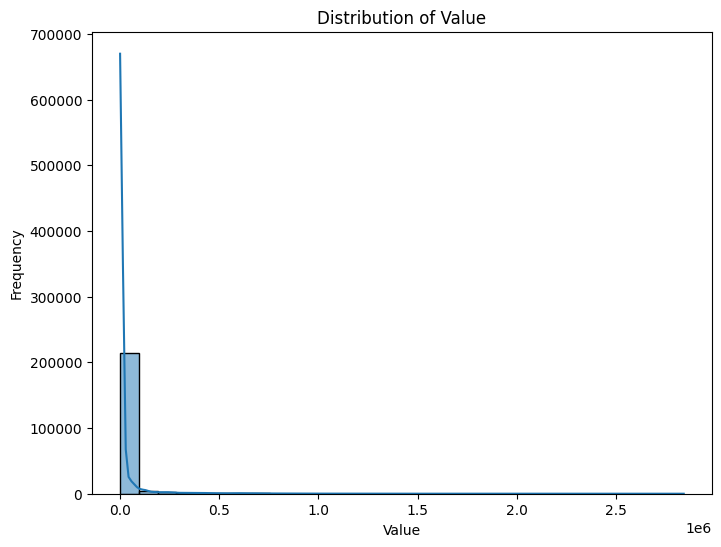

In [ ]:
# Distribution of numerical features
numeric_features = ['Value']
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

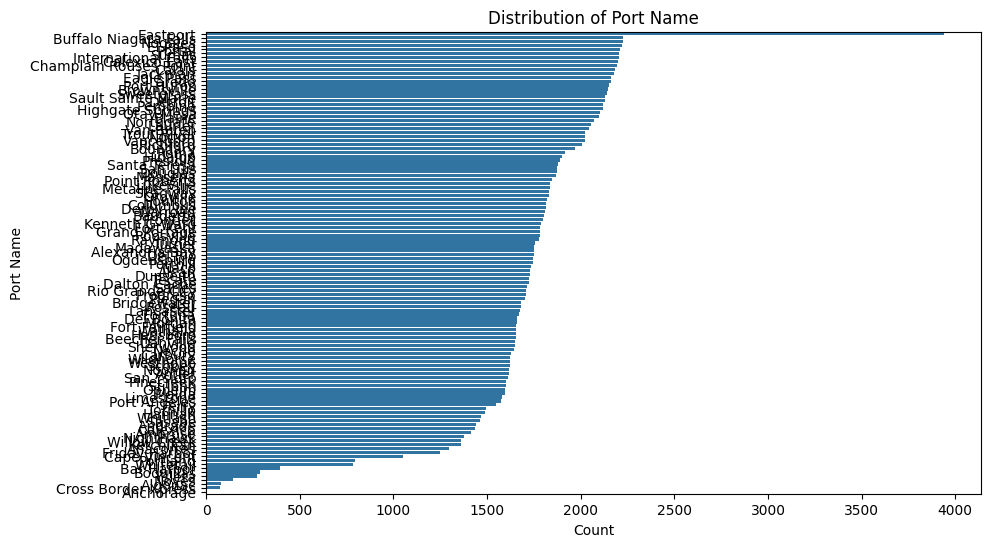

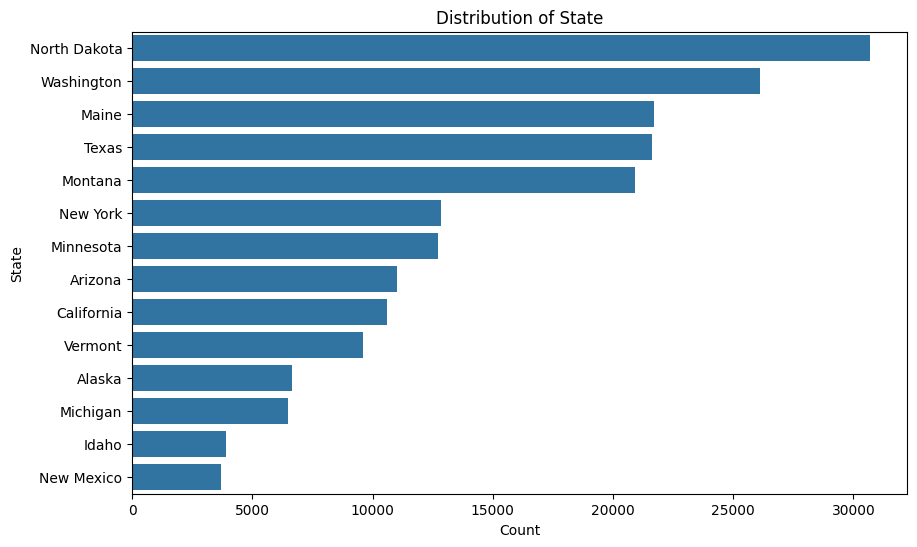

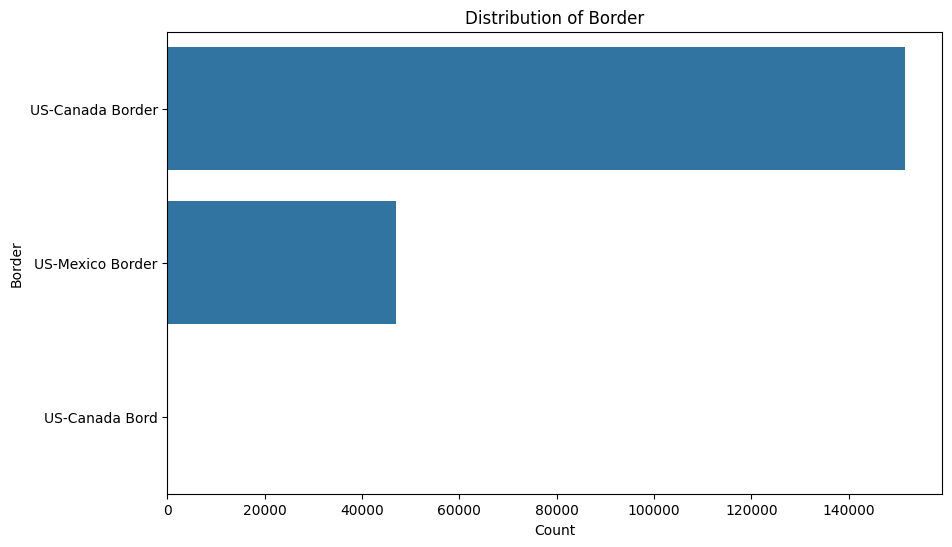

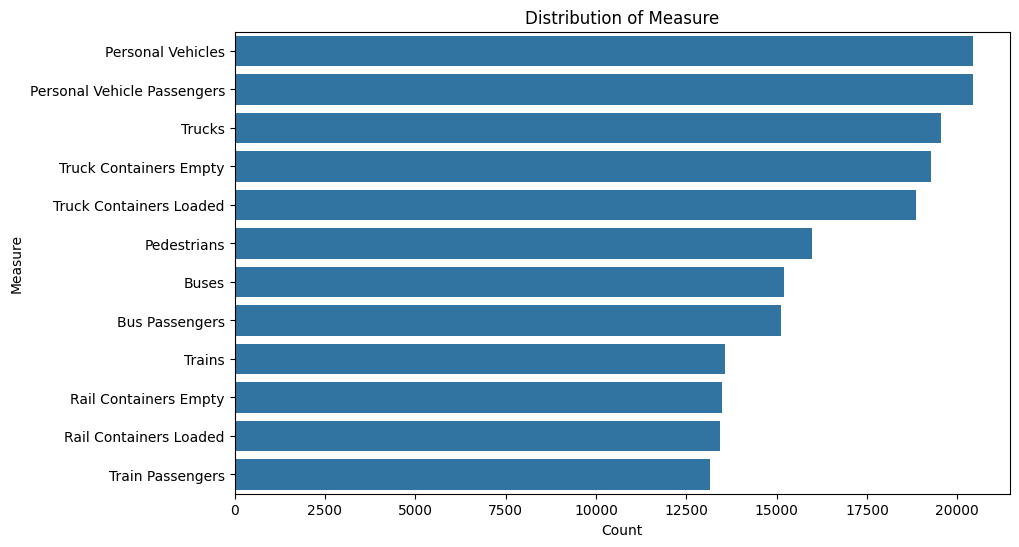

In [ ]:
# Distribution of categorical features
categorical_features = ['Port Name', 'State', 'Border', 'Measure']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[feature], order=df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)
    plt.show()


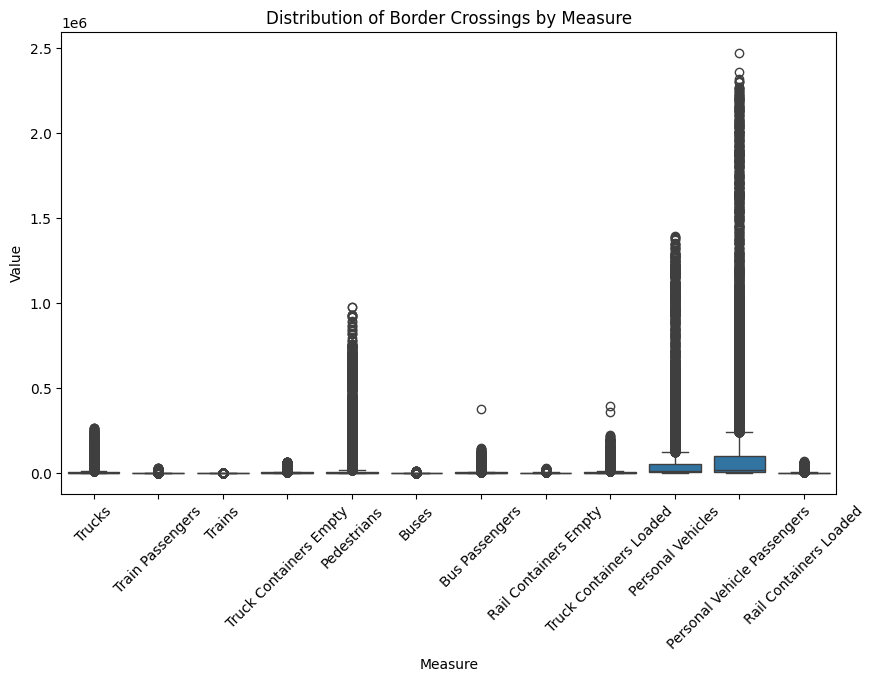

In [ ]:
# Measure-wise analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='Measure', y='Value', data=df)
plt.title('Distribution of Border Crossings by Measure')
plt.xlabel('Measure')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()


<ipython-input-15-a62c6dccf750>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


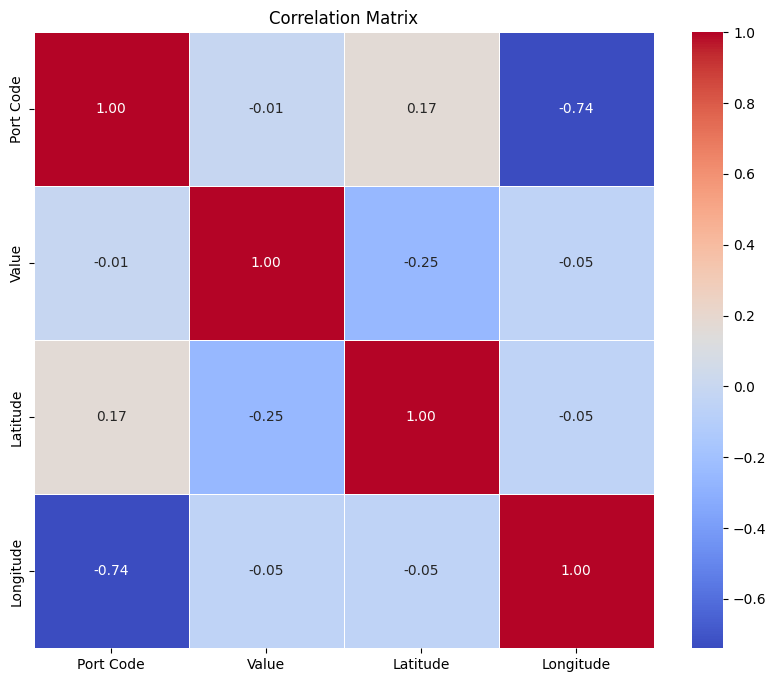

In [ ]:
# Correlation analysis
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
#on Which states have the highest Occurrence in each border
df.groupby(['Border','State']).count()

Port Name  Port Code   Date  Measure  Value  \
Border           State                                                       
US-Canada Bord   Washington            1          1      0        0      0   
US-Canada Border Alaska             6645       6645   6645     6645   6645   
                 Idaho              3885       3885   3885     3885   3885   
                 Maine             21685      21685  21685    21685  21685   
                 Michigan           6493       6493   6493     6493   6493   
                 Minnesota         12706      12706  12706    12706  12706   
                 Montana           20935      20935  20935    20935  20935   
                 New York          12862      12862  12862    12862  12862   
                 North Dakota      30700      30700  30700    30700  30700   
                 Vermont            9618       9618   9618     9618   9618   
                 Washington        26118      26118  26118    26118  26118   
US-Mexico Border Arizona           11005      11005  11005    11005  11005   
                 California        10594      10594  10594    10594  10594   
                 New Mexico         3695       3695   3695     3695   3695   
                 Texas             21614      21614  21614    21614  21614   

                               Latitude  Longitude  Point  
Border           State                                     
US-Canada Bord   Washington           0          0      0  
US-Canada Border Alaska            6644       6644   6644  
                 Idaho             3885       3885   3885  
                 Maine            21685      21685  21685  
                 Michigan          6493       6493   6493  
                 Minnesota        12706      12706  12706  
                 Montana          20935      20935  20935  
                 New York         12862      12862  12862  
                 North Dakota     30700      30700  30700  
                 Vermont           9618       9618   9618  
                 Washington       26118      26118  26118  
US-Mexico Border Arizona          11005      11005  11005  
                 California       10594      10594  10594  
                 New Mexico        3695       3695   3695  
                 Texas            21614      21614  21614

<ipython-input-17-4640f0d5eda0>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(border_us_canada_count.index, rotation=80)
<ipython-input-17-4640f0d5eda0>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(border_us_mexico_count.index, rotation=80)


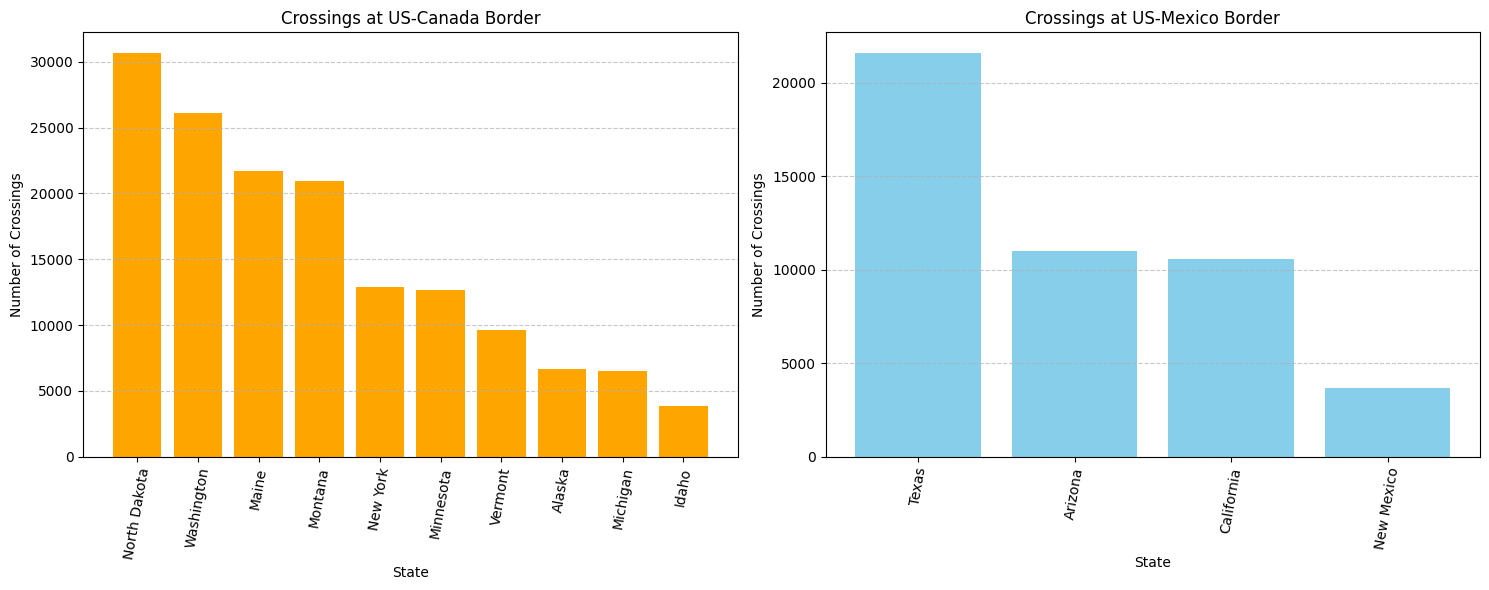

In [ ]:
# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for Border = "US-Canada Border"
df_us_canada = df[df['Border'] == 'US-Canada Border']
border_us_canada_count = df_us_canada['State'].value_counts()
axes[0].bar(border_us_canada_count.index, border_us_canada_count.values, color='orange')
axes[0].set_title('Crossings at US-Canada Border')
axes[0].set_xlabel('State')
axes[0].set_ylabel('Number of Crossings')
axes[0].set_xticklabels(border_us_canada_count.index, rotation=80)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot for Border = "US-Mexico Border"
df_us_mexico = df[df['Border'] == 'US-Mexico Border']
border_us_mexico_count = df_us_mexico['State'].value_counts()
axes[1].bar(border_us_mexico_count.index, border_us_mexico_count.values, color='skyblue')
axes[1].set_title('Crossings at US-Mexico Border')
axes[1].set_xlabel('State')
axes[1].set_ylabel('Number of Crossings')
axes[1].set_xticklabels(border_us_mexico_count.index, rotation=80)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [ ]:
# Check the number of unique borders
num_borders = len(df['Border'].unique())
print("Number of unique borders:", num_borders)

Number of unique borders: 3
